# (A)On the dataset provided,
1.Perform EDA and upload the notebook. Along with the charts we have covered, create 5 types of charts which were not done in class (refer Seaborn documentation).

# Import all Necessary Libraries

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(11.7,8.27)})

# Import the data

In [9]:
real = pd.read_csv("Real estate.csv", index_col=0)

In [10]:
real.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
real.sample(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
186,2012.750,31.4,1447.28600,3,24.97285,121.51730,21.5
148,2012.750,3.2,489.88210,8,24.97017,121.54494,43.2
161,2012.917,3.5,49.66105,8,24.95836,121.53756,57.8
390,2013.250,40.9,122.36190,8,24.96756,121.54230,67.7
338,2012.833,31.3,600.86040,5,24.96871,121.54651,30.9


In [12]:
real.shape

(414, 7)

In [13]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [14]:
real.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [15]:
real.columns = ['Transaction date','House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']

In [16]:
real.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:
real.isnull().any()

Transaction date                       False
House age                              False
Distance to the nearest MRT station    False
Number of convenience stores           False
Latitude                               False
Longitude                              False
House price of unit area               False
dtype: bool

In [18]:
real.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [19]:
col = ['Transaction date']
real[col] = real[col].applymap(np.int64)

In [20]:
real

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [21]:
real.corr()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
Transaction date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
House age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House price of unit area,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Visualizing the data

Relational plots

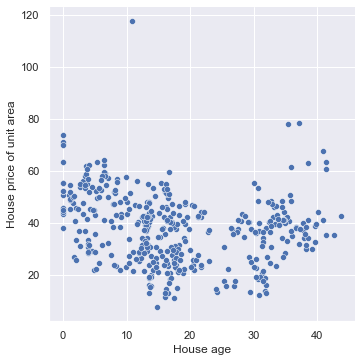

In [24]:
sns.relplot(x = "House age", y = "House price of unit area", data = real)

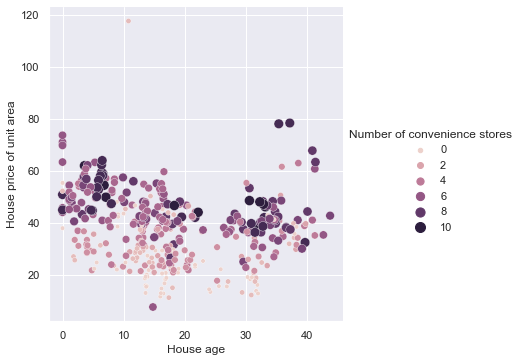

In [25]:
sns.relplot(x = "House age", y = "House price of unit area", size = "Number of convenience stores", sizes =(20,100), data = real, hue = "Number of convenience stores")

Scatter plots

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

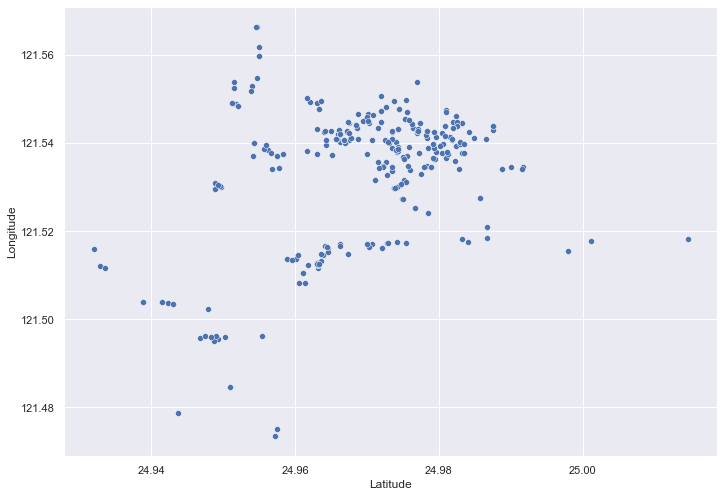

In [26]:
sns.scatterplot(x ="Latitude", y ="Longitude", data = real)

Categorical plots

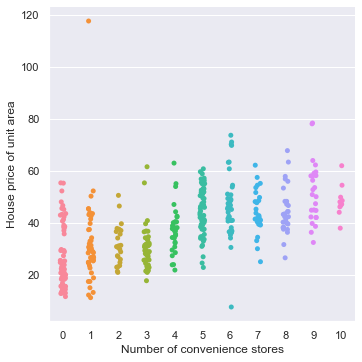

In [28]:
sns.catplot(x = "Number of convenience stores", y = "House price of unit area", data = real);

Bee swarm plot

<AxesSubplot:xlabel='Transaction date', ylabel='House price of unit area'>

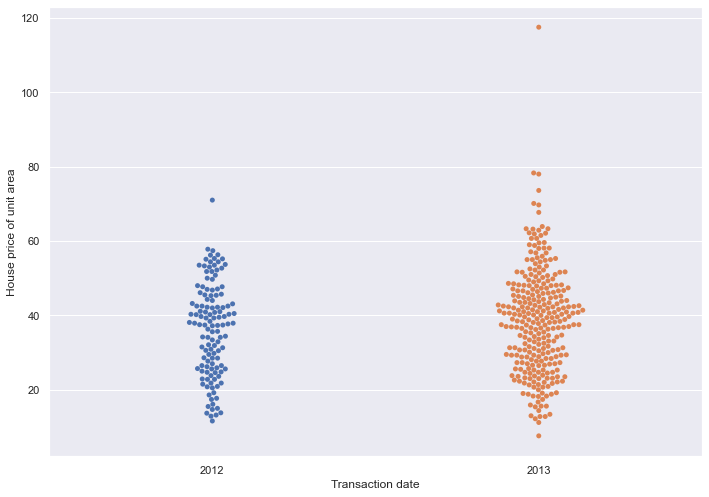

In [29]:
sns.swarmplot(x ="Transaction date", y = "House price of unit area", data = real)

Boxplot

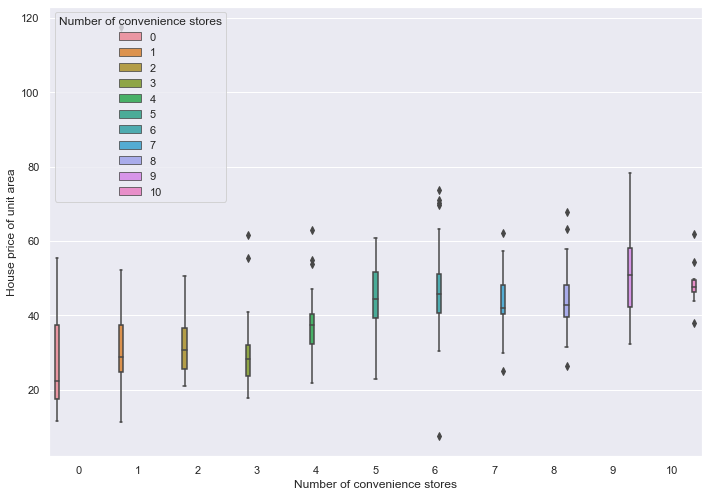

In [30]:
sns.boxplot(x = "Number of convenience stores", y = "House price of unit area", hue = "Number of convenience stores", data = real);

Boxen plot

<AxesSubplot:xlabel='Transaction date', ylabel='Number of convenience stores'>

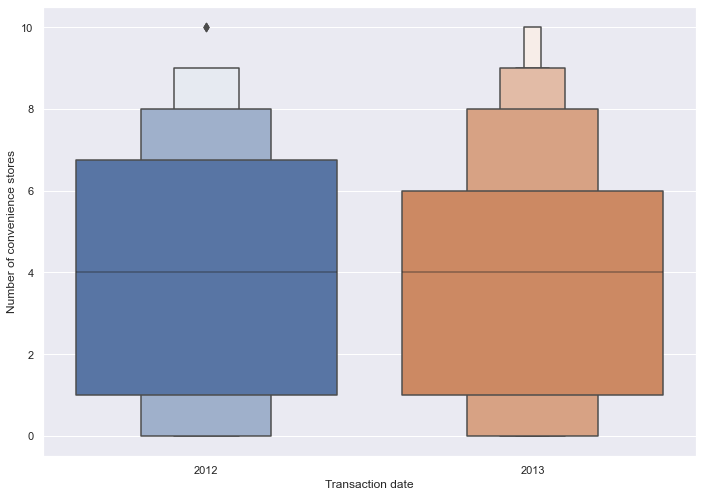

In [32]:
sns.boxenplot(x = "Transaction date", y = "Number of convenience stores", data = real)

Fancy boxplot

<AxesSubplot:xlabel='Transaction date', ylabel='House price of unit area'>

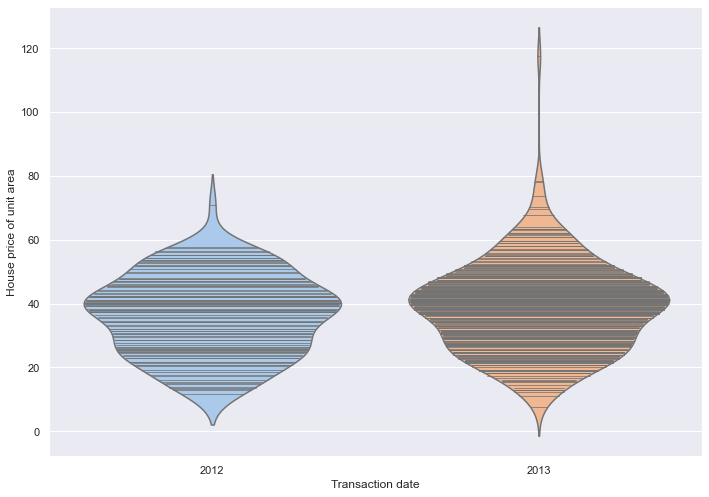

In [37]:
sns.violinplot(x ="Transaction date", y = "House price of unit area",palette= "pastel", inner= "stick" ,data = real,)

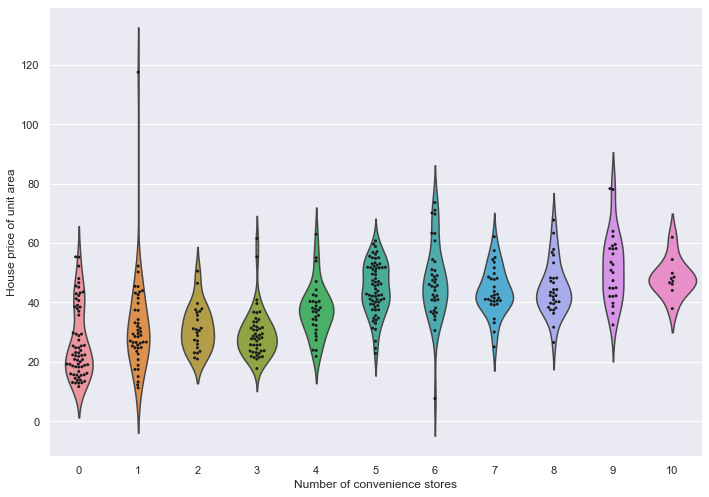

In [40]:
sns.violinplot(x = "Number of convenience stores", y = "House price of unit area", inner = None, data = real);
sns.swarmplot(x = "Number of convenience stores", y = "House price of unit area", color = "k", size = 3, data = real);

Barplot

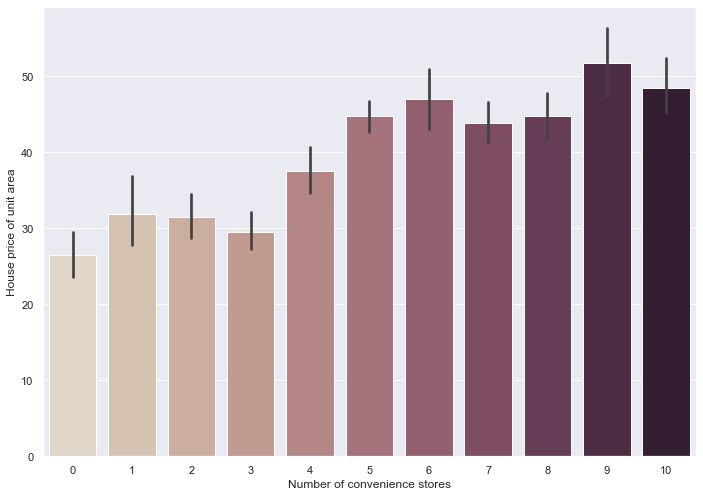

In [43]:
sns.barplot(x = "Number of convenience stores", y = "House price of unit area", palette = "ch:.25", data = real);

Point plot

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

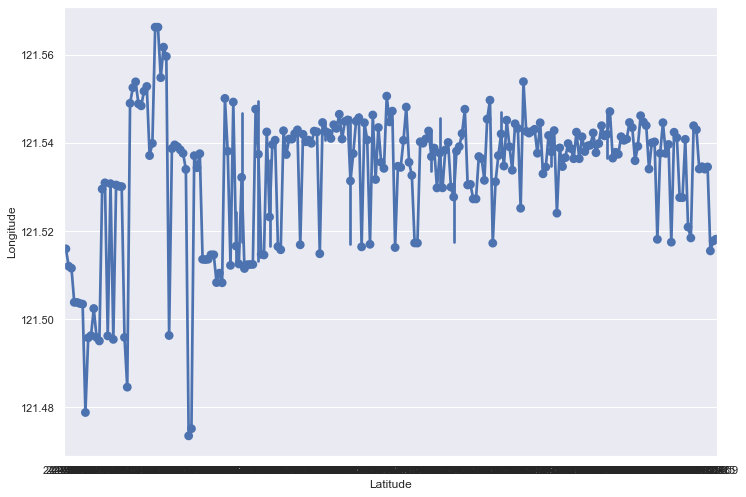

In [44]:
sns.pointplot(x ="Latitude", y ="Longitude", data= real)

Some other plots

(1) displot - Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data:

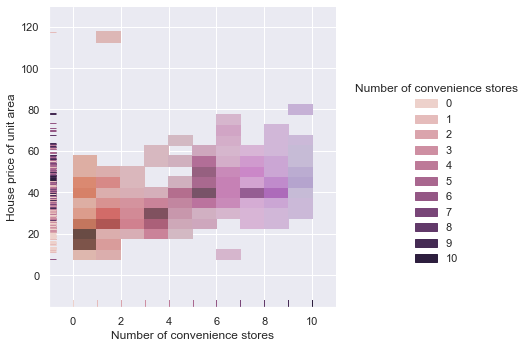

In [46]:
sns.displot(data=real,x = "Number of convenience stores", y = "House price of unit area", hue = "Number of convenience stores" , rug=True)

(2)jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution.

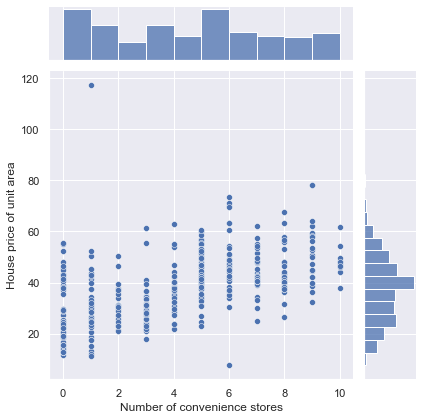

In [49]:
sns.jointplot(data=real,x = "Number of convenience stores", y = "House price of unit area")

(3)pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

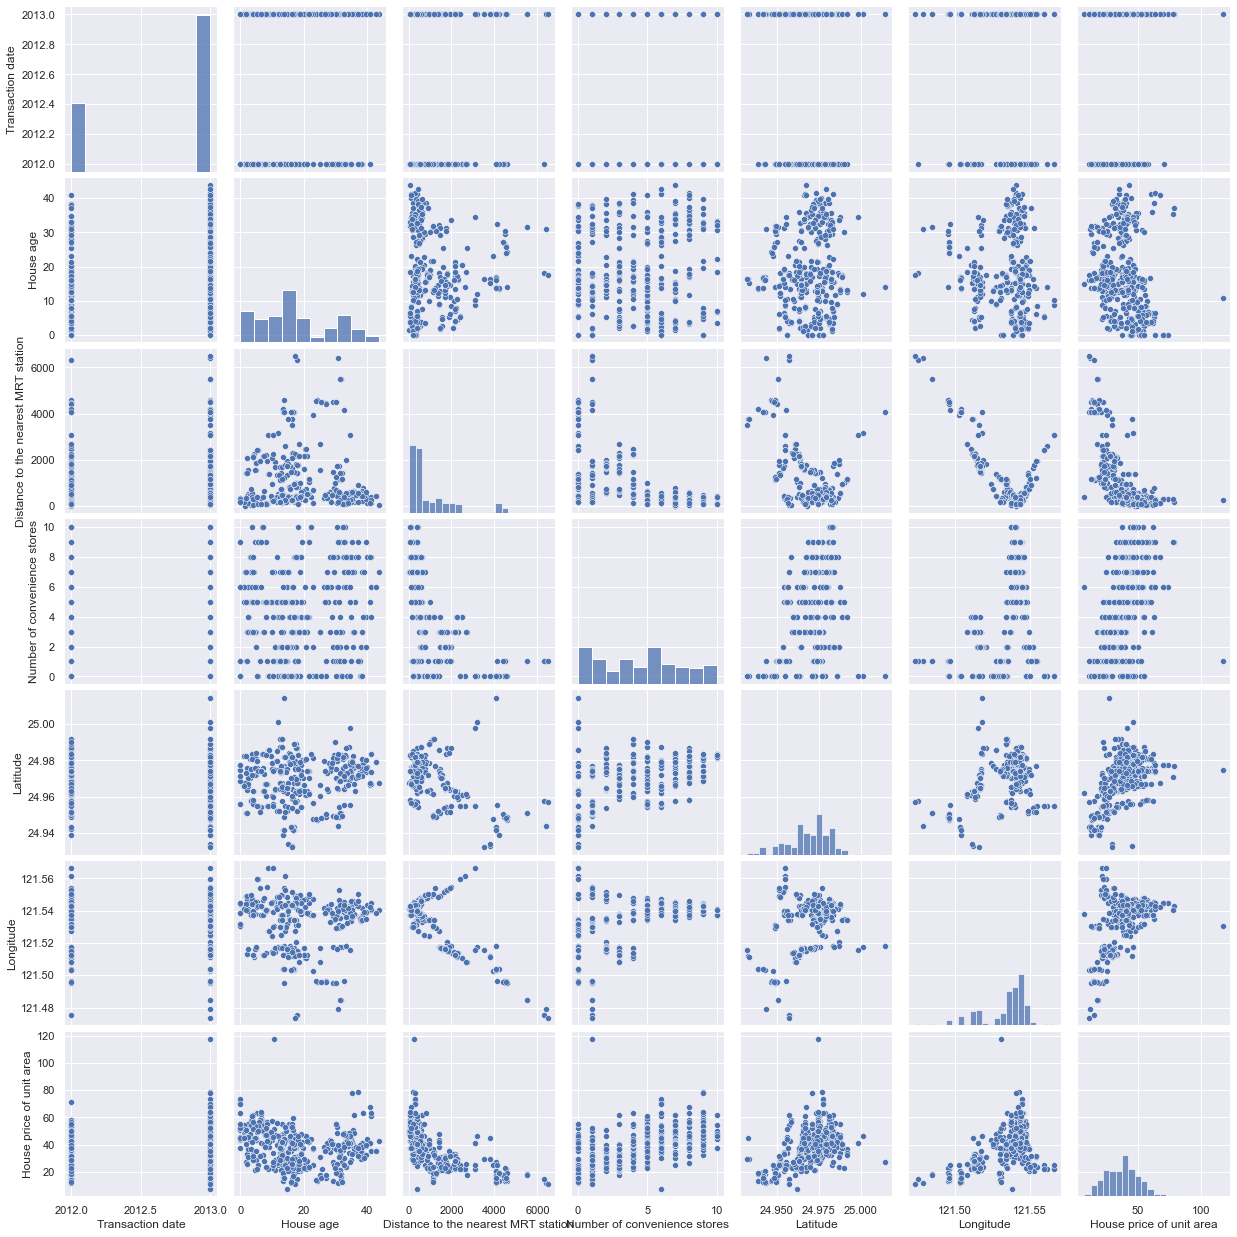

In [27]:
sns.pairplot(real)

(4) lmplot - Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot()

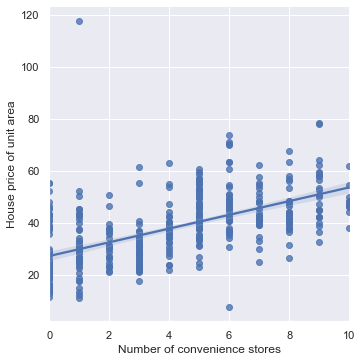

In [50]:
sns.lmplot(data=real,x = "Number of convenience stores", y = "House price of unit area" )

(5) hist()

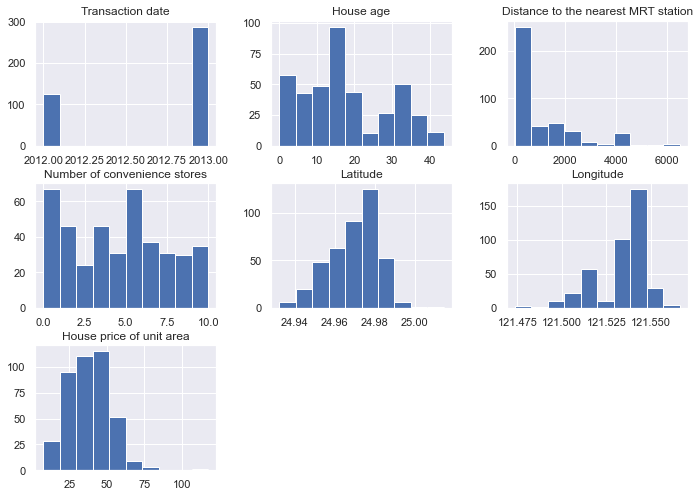

In [52]:
real.hist()
plt.show()